In [79]:
#Modulos
import pandas as pd
import numpy as np
import scipy
from math import sqrt 
import matplotlib.pyplot as plt

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

In [41]:
#Estimadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [156]:
#Metricas de Modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score

In [43]:
#Cross Validation
from sklearn.model_selection import train_test_split

In [5]:
Df_winequality = pd.read_csv('winequality.csv', header =0)
Df_winequality.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type,quality,quality_required
0,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,Red,3,No
1,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,Red,5,No
2,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,Red,5,No
3,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,Red,5,No
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,Red,3,No


In [6]:
Df_winequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  Grape_type            6497 non-null   object 
 12  quality               6497 non-null   int64  
 13  quality_required      6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [7]:
pd.isnull(Df_winequality).sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Grape_type              0
quality                 0
quality_required        0
dtype: int64

Histograma Quality

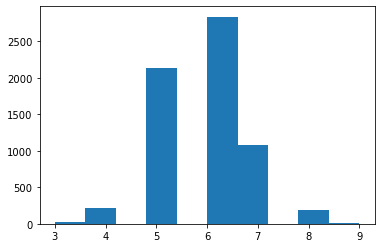

In [8]:
plt.hist(Df_winequality['quality'])
plt.show()

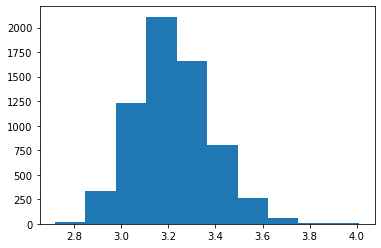

In [9]:
plt.hist(Df_winequality['pH'])
plt.show()

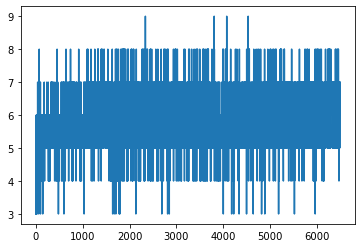

In [10]:
plt.plot(Df_winequality['quality'])
plt.show()

Histograma de Alcohol

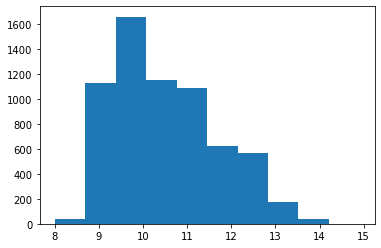

In [11]:
plt.hist(Df_winequality['alcohol'])
plt.show()

Diagrama de Dispersión

In [4]:
x = Df_winequality['alcohol']
y = Df_winequality['quality']
plt.scatter(x,y)
plt.show()

NameError: name 'Df_winequality' is not defined

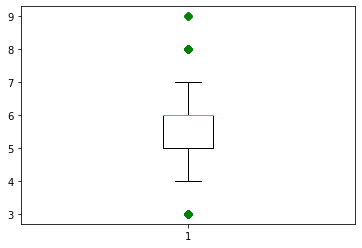

In [13]:
A = Df_winequality['quality']
plt.boxplot(A,0,'gD')
plt.show()

Box Plot Alcohol

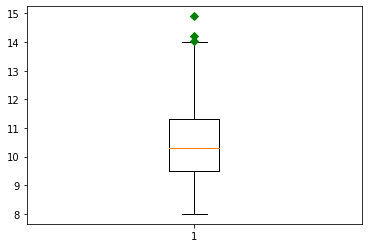

In [14]:
B = Df_winequality['alcohol']
plt.boxplot(B,0,'gD')
plt.show()

In [15]:
Dfwinequality = Df_winequality.drop(columns = ["quality"])

In [16]:
header = Dfwinequality.dtypes.index
print(header)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Grape_type', 'quality_required'],
      dtype='object')


In [17]:
Dfwinequality.quality_required.describe()

count     6497
unique       2
top         No
freq      5220
Name: quality_required, dtype: object

In [18]:
Dfwinequality.alcohol.describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

Cambio de tipo de variable

In [19]:
Dfwinequality["Grape_type"] = Dfwinequality["Grape_type"].astype("category")

In [47]:
Dfwinequality = pd.get_dummies(Dfwinequality, columns = ["Grape_type"], drop_first = True)

In [20]:
Dfwinequality["quality_required"] = Dfwinequality["quality_required"].astype("category")

In [48]:
Dfwinequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality_required      6497 non-null   category
 12  Grape_type_White      6497 non-null   uint8   
dtypes: category(1), float64(11), uint8(1)
memory usage: 571.3 KB


In [54]:
Dfwinequality = Dfwinequality[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
               'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Grape_type_White', 'quality_required']]

In [55]:
Dfwinequality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  Grape_type_White      6497 non-null   uint8   
 12  quality_required      6497 non-null   category
dtypes: category(1), float64(11), uint8(1)
memory usage: 571.3 KB


Construicción y evaluación de modelos

 Features

In [56]:
features = Dfwinequality.iloc[:,0:12]
print('Resumen de la muestra de características')
features.head()

Resumen de la muestra de características


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White
0,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0
1,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,0
2,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,0
3,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,0
4,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0


Dependent variable

In [57]:
depVar = Dfwinequality['quality_required']

Training Set 70% (Feature Space: X Training)

Feature Training Set

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.30, random_state=0)

In [59]:
#Doble Check
X_train.shape, X_test.shape

((4547, 12), (1950, 12))

Modelos

In [60]:
modelDTC = DecisionTreeClassifier()
modelrfc = RandomForestClassifier()
modelKNC = KNeighborsClassifier()
modelSVC = SVC()

In [61]:
modelDTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
modelrfc.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
modelKNC.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
modelSVC.fit(X_train,y_train)

SVC()

Kappa de Cohen (κ)

Si K es cero, ello significa que la concordancia observada coincide con la que ocurriría por puro azar. Valores positivos señalan mayor concordancia que la que se esperaría por el puro azar. Si el resultado fuera 1, se trataría de una concordancia perfecta. Si K toma un valor negativo, significa existencia de discordancia, que solamente en la tabla de 2*2, podría llegar hasta -1, lo que señalaría una discordancia total entre las dos clasificaciones o evaluaciones.

Metricas Modelo Decision Tree Classifier

In [157]:
predictionsDTC = modelDTC.predict(X_test)
print (accuracy_score(y_test,predictionsDTC))
print (confusion_matrix(y_test,predictionsDTC))
print (cohen_kappa_score(y_test,predictionsDTC))

0.8307692307692308
[[1390  168]
 [ 162  230]]
0.47617683163094193


Metricas Modelo Random Forest Classifier

In [158]:
predictionsrfc = modelrfc.predict(X_test)
print (accuracy_score(y_test,predictionsrfc))
print (confusion_matrix(y_test,predictionsrfc))
print (cohen_kappa_score(y_test,predictionsrfc))

0.8897435897435897
[[1513   45]
 [ 170  222]]
0.6102617590790185


Metricas Modelo KNeighbors Classifier

In [159]:
predictionsKNC = modelKNC.predict(X_test)
print (accuracy_score(y_test,predictionsKNC))
print (confusion_matrix(y_test,predictionsKNC))
print (cohen_kappa_score(y_test,predictionsKNC))

0.7958974358974359
[[1438  120]
 [ 278  114]]
0.25176718303504275


Metricas Modelo SVC

In [160]:
predictionsSVC = modelSVC.predict(X_test)
print (accuracy_score(y_test,predictionsSVC))
print (confusion_matrix(y_test,predictionsSVC))
print (cohen_kappa_score(y_test,predictionsSVC))

0.798974358974359
[[1558    0]
 [ 392    0]]
0.0


Imprimir Resultados

In [93]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White
5316,6.8,0.210,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,1
5210,6.5,0.210,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,1
3518,6.2,0.280,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1
1622,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,1
2443,8.2,0.350,0.40,6.3,0.039,35.0,162.0,0.99360,3.15,0.34,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,6.2,0.150,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,1
3035,6.6,0.310,0.49,7.7,0.050,52.0,220.0,0.99640,3.12,0.45,8.8,1
3410,7.2,0.290,0.20,7.7,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,1
6099,6.6,0.160,0.57,1.1,0.130,58.0,140.0,0.99270,3.12,0.39,9.3,1


In [92]:
predictionsrfc

array(['Si', 'Si', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [125]:
DFpred = pd.DataFrame(predictionsrfc)

In [127]:
DFpred = DFpred.reset_index()

In [128]:
DFpred

,index,0
0,0,Si
1,1,Si
2,2,No
3,3,No
4,4,No
...,...,...
1945,1945,No
1946,1946,No
1947,1947,No
1948,1948,No


In [121]:
DFx_test = pd.DataFrame(X_test)

In [123]:
DFx_test = DFx_test.reset_index()

In [124]:
DFx_test

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White
0,5316,6.8,0.210,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,1
1,5210,6.5,0.210,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,1
2,3518,6.2,0.280,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1
3,1622,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,1
4,2443,8.2,0.350,0.40,6.3,0.039,35.0,162.0,0.99360,3.15,0.34,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6277,6.2,0.150,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,1
1946,3035,6.6,0.310,0.49,7.7,0.050,52.0,220.0,0.99640,3.12,0.45,8.8,1
1947,3410,7.2,0.290,0.20,7.7,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,1
1948,6099,6.6,0.160,0.57,1.1,0.130,58.0,140.0,0.99270,3.12,0.39,9.3,1


In [146]:
DFx_test = DFx_test.rename(columns={'index':'No_Test'})

In [147]:
DFx_test

,No_Test,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White
0,5316,6.8,0.210,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,1
1,5210,6.5,0.210,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,1
2,3518,6.2,0.280,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1
3,1622,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,1
4,2443,8.2,0.350,0.40,6.3,0.039,35.0,162.0,0.99360,3.15,0.34,11.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6277,6.2,0.150,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,1
1946,3035,6.6,0.310,0.49,7.7,0.050,52.0,220.0,0.99640,3.12,0.45,8.8,1
1947,3410,7.2,0.290,0.20,7.7,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,1
1948,6099,6.6,0.160,0.57,1.1,0.130,58.0,140.0,0.99270,3.12,0.39,9.3,1


In [148]:
DFPredicted = pd.concat([DFx_test,DFpred], axis=1)

In [149]:
DFPredicted

,No_Test,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White,index,0
0,5316,6.8,0.210,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,1,0,Si
1,5210,6.5,0.210,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,1,1,Si
2,3518,6.2,0.280,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1,2,No
3,1622,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,1,3,No
4,2443,8.2,0.350,0.40,6.3,0.039,35.0,162.0,0.99360,3.15,0.34,11.9,1,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6277,6.2,0.150,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,1,1945,No
1946,3035,6.6,0.310,0.49,7.7,0.050,52.0,220.0,0.99640,3.12,0.45,8.8,1,1946,No
1947,3410,7.2,0.290,0.20,7.7,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,1,1947,No
1948,6099,6.6,0.160,0.57,1.1,0.130,58.0,140.0,0.99270,3.12,0.39,9.3,1,1948,No


In [151]:
DFPredicted = DFPredicted.rename(columns={0:'Quality_Predicted'})

In [152]:
DFPredicted = DFPredicted.rename(columns={'index':'No_Predicted'})

In [153]:
DFPredicted

,No_Test,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Grape_type_White,No_Predicted,Quality_Predicted
0,5316,6.8,0.210,0.40,6.3,0.032,40.0,121.0,0.99214,3.18,0.53,12.0,1,0,Si
1,5210,6.5,0.210,0.37,2.5,0.048,70.0,138.0,0.99170,3.33,0.75,11.4,1,1,Si
2,3518,6.2,0.280,0.22,7.3,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1,2,No
3,1622,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,1,3,No
4,2443,8.2,0.350,0.40,6.3,0.039,35.0,162.0,0.99360,3.15,0.34,11.9,1,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,6277,6.2,0.150,0.27,1.4,0.041,51.0,117.0,0.99090,3.28,0.38,11.2,1,1945,No
1946,3035,6.6,0.310,0.49,7.7,0.050,52.0,220.0,0.99640,3.12,0.45,8.8,1,1946,No
1947,3410,7.2,0.290,0.20,7.7,0.046,51.0,174.0,0.99582,3.16,0.52,9.5,1,1947,No
1948,6099,6.6,0.160,0.57,1.1,0.130,58.0,140.0,0.99270,3.12,0.39,9.3,1,1948,No


In [154]:
DFPredicted = DFPredicted.to_excel("Data_Frame_Predicted.xlsx")